# Pymaceuticals Inc.
---

### Analysis

- Among the drugs tested, the standouts were Capomulin and Ramicane being the two most effective, particularly when compared against Infubinol and Ceftamin. 

- Interestingly Infubinol had some curious outliers that performed similarly to Capomulin and Ramicane that might warrant a closer look in the future.

- There was a positive correlation of .84 between mouse weight and tumor weight, as the weight of the given mouse went up so too did the weight of the given tumor. This means about 70% of the variation can be attributed to mouse weight.

- The most extensively tested drugs were Capomulin and Ramicane by sheer numbers, with Propriva being tested less so than the others. 
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
merged_data = merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

merged_data.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [2]:
# Checking the number of mice. 249 is goal.
mices = merged_data['Mouse ID'].value_counts()
total_mice = len(mices)
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# the goal on this one looks like: array(['g989'], dtype=object)
# I need to look into this one some more because the syntax really tripped me up

duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Optional means we'll give this one our best first pass and then come back later

duplicate_mouse_df = merged_data.loc[merged_data['Mouse ID'] == 'g989', :]

duplicate_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_data[merged_data['Mouse ID'].isin(duplicate_mice) == False]

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame. 248 is the goal per the instructions

mice_cleaned = cleaned_df['Mouse ID'].value_counts()

total_clean_mice = len(mice_cleaned)

otal_clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

drug_median = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

drug_variance = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

drug_std = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

drug_sem = cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

stats_table = pd.DataFrame({"Mean Tumor Volume":drug_mean, 
                            "Median Tumor Volume":drug_median, 
                            "Tumor Volume Variance":drug_variance, 
                            "Tumor Volume Std. Dev.":drug_std, 
                            "Tumor Volume Std. Err.":drug_sem})

stats_table

#it generates a table but also a red message regarding deprecation, so not sure if that is
#something I should worry about or not
#additionally worrying is I was able to get the aggregate method to give the appropriate table 
#without a red futurewarning message :/

/var/folders/2j/t9232w816xqdbqsgkhpv7mr00000gn/T/ipykernel_77943/68713091.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_mean = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
/var/folders/2j/t9232w816xqdbqsgkhpv7mr00000gn/T/ipykernel_77943/68713091.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_median = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
/var/folders/2j/t9232w816xqdbqsgkhpv7mr00000gn/T/ipykernel_77943/68713091.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only w

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_table =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

agg_table

#I like the aggregate method, so much less typing and no red error message this time so I at least got
#all the kinks out of this one

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

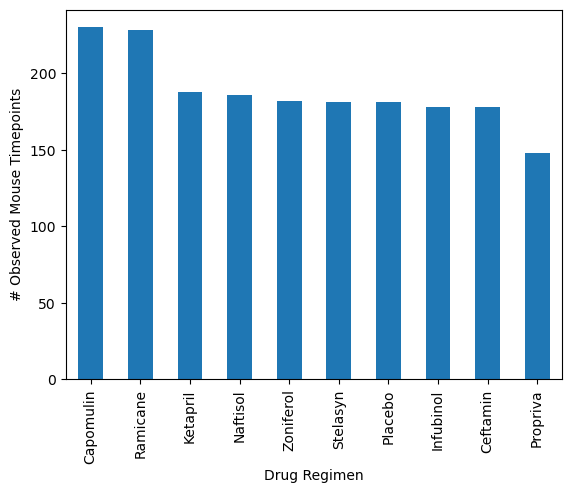

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mousetime_count = cleaned_df['Drug Regimen'].value_counts()

plot_pandas = mousetime_count.plot.bar(color='tab:blue')  
#plt.show() 
#ok looks like the starter example, except I haven't labeled either axis, so I'll borrow the nomenclature in the 
#starter for the labels which is # Observed Mouse Timepoints and Drug Regimen

plt.ylabel('# Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

plt.show()

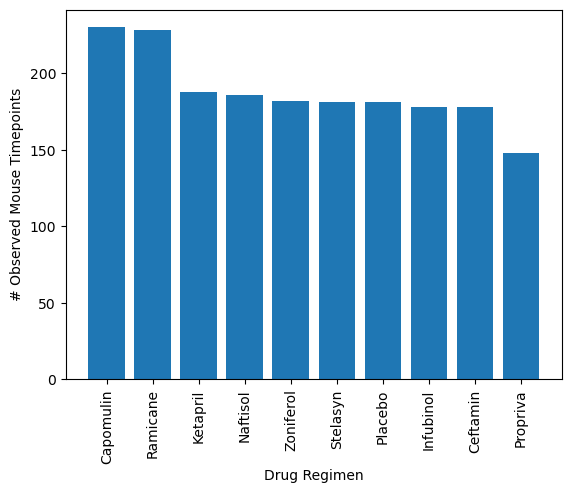

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#ok make it look the same but use pyplot to get there

y_axis = mousetime_count.values

x_axis = mousetime_count.index.values

plt.bar(x_axis, y_axis, color='tab:blue')

#plt.show()
#ok some obvious issues here: forgot to label both axis again, and then I need to rotate the names of the drugs
#so they can actually be read. am I missing anything else? not that I can see at this moment at least.

plt.ylabel('# Observed Mouse Timepoints')

plt.xlabel('Drug Regimen')

#then rotate
plt.xticks(rotation='vertical')

plt.show()

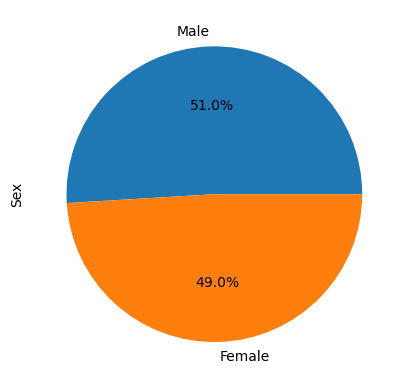

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# the image in the example aslo seems to show rounded percentages

gender_info = cleaned_df['Sex'].value_counts()

gender_info.plot.pie(autopct = "%1.1f%%")

plt.show()

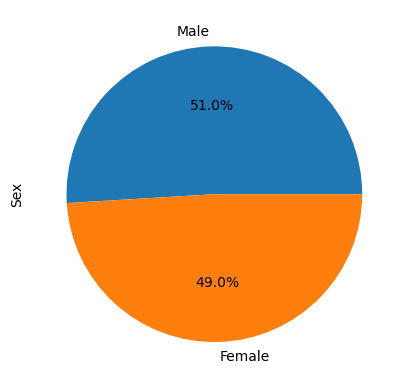

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plot = gender_info.plot.pie(y = 'Total Count', autopct = "%1.1f%%")

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

greatest_mouse = merged_data.groupby(['Mouse ID']).max()

greatest_mouse_reset = greatest_mouse.reset_index()

quart_merged_data = greatest_mouse_reset[['Mouse ID','Timepoint']].merge(merged_data,on = ['Mouse ID','Timepoint'],how="left")

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bound
    

#need to take another look at this when i have time
    
def get_outliers(regimen):
    regimen_data = quart_merged_data.loc[quart_merged_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
    outliers = regimen_data.loc[(regimen_data < lower_bound)|(regimen_data > upper_bound)]
    
    print(f"{regimen}'s potential outliers:{outliers}")
    
    return regimen_data

#need to save these values back to some reference points to call later when making the boxplot

capo = get_outliers("Capomulin")
rami = get_outliers("Ramicane")
infu = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


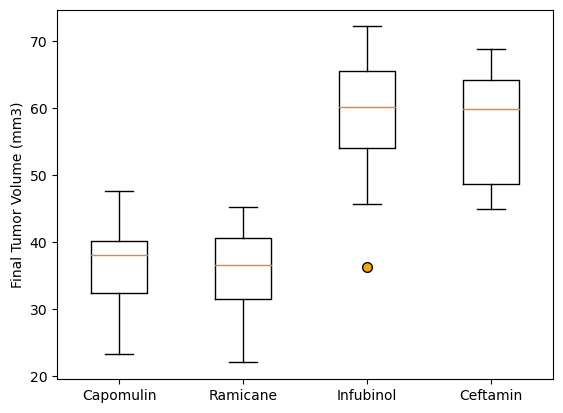

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

custom_dot = dict(markerfacecolor = "orange", markersize=7)

plt.boxplot([capo, rami, infu, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops = custom_dot)

plt.ylabel('Final Tumor Volume (mm3)')


plt.show()

## Line and Scatter Plots

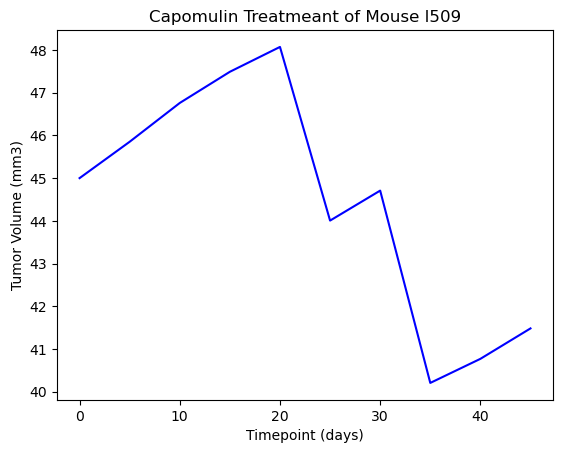

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.
# in the displayed example the chart title is Capomulin Treatment of Mouse 1509

Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]

line_graph_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]

line_graph_df.head()

x_axis = line_graph_df["Timepoint"]

y_axis = line_graph_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis,color="blue")
plt.title('Capomulin Treatmeant of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

/var/folders/2j/t9232w816xqdbqsgkhpv7mr00000gn/T/ipykernel_77943/1156872914.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_tumor_volume = Capomulin_df.groupby(['Mouse ID']).mean()


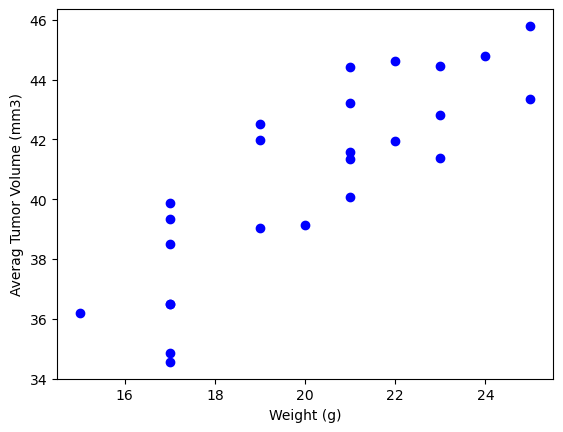

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_tumor_volume = Capomulin_df.groupby(['Mouse ID']).mean()


plt.scatter(cap_tumor_volume['Weight (g)'],cap_tumor_volume['Tumor Volume (mm3)'], color="blue")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
#got the red futurewarning again about depracted dataframegroupbydotmean

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_tumor_volume['Weight (g)'],cap_tumor_volume['Tumor Volume (mm3)'])

#print statement wording taken from the example listed in the starter code

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#all we have to do now is to get this line superimposed on the scatterplot we already made

The correlation between mouse weight and the average tumor volume is 0.84


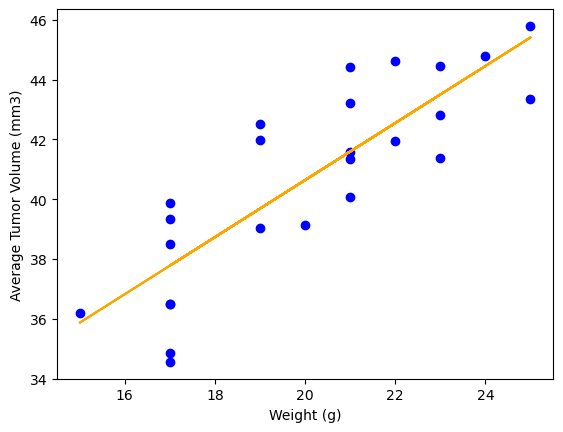

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_tumor_volume['Weight (g)'],cap_tumor_volume['Tumor Volume (mm3)'])

reg_val = cap_tumor_volume['Weight (g)'] * slope + intercept

reg_line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_tumor_volume['Weight (g)'],cap_tumor_volume['Tumor Volume (mm3)'], color="blue")
plt.plot(cap_tumor_volume['Weight (g)'], reg_val, color='orange')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()